In [134]:
import matplotlib.pyplot as plt
from load import load_2023_12_30
from tile import Tile
from track import Track
from signal_processing import maxIndex

a50_2023_12_30, a50_all_2023_12_30, f6p_2023_12_30, tile_2023_12_30_runs = load_2023_12_30()

A50 Downhill Tracks
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Downhill | Date 2023-12-30 | Time 12:18:53 | Duration [s] 114 | Length [m] 1032
	 Track type Downhill | Date 2023-12-30 | Time 12:21:47 | Duration [s] 40 | Length [m] 111
A50 All Tracks
	 Track type Hold | Date 2023-12-30 | Time 11:52:15 | Duration [s] 110 | Length [m] 36
	 Track type Walk | Date 2023-12-30 | Time 11:54:05 | Duration [s] 103 | Length [m] 56
	 Track type Hold | Date 2023-12-30 | Time 11:55:48 | Duration [s] 74 | Length [m] 22
	 Track type Walk | Date 2023-12-30 | Time 11:57:02 | Duration [s] 82 | Length [m] 53
	 Track type Lift | Date 2023-12-30 | Time 11:58:24 | Duration [s] 485 | Length [m] 862
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Walk | Date 2023-12-30 | Time 12:08:24 | Duration [s] 92 | Length [m] 75
	 Track type Lift | Date 2023-12-30 | Time 12:09:56 | Duration [s] 410 | Leng

## Plotting Euler Data with G-forces

G-forces should register at twice the frequency due to similar angular accelerations felt at every turn, while rolling should occur +ve, then -ve between turns. Assuming this, we can clearly calculate the number of turns and determine if they were left or right.

In [135]:
run1 = tile_2023_12_30_runs[0]
run2 = tile_2023_12_30_runs[1]

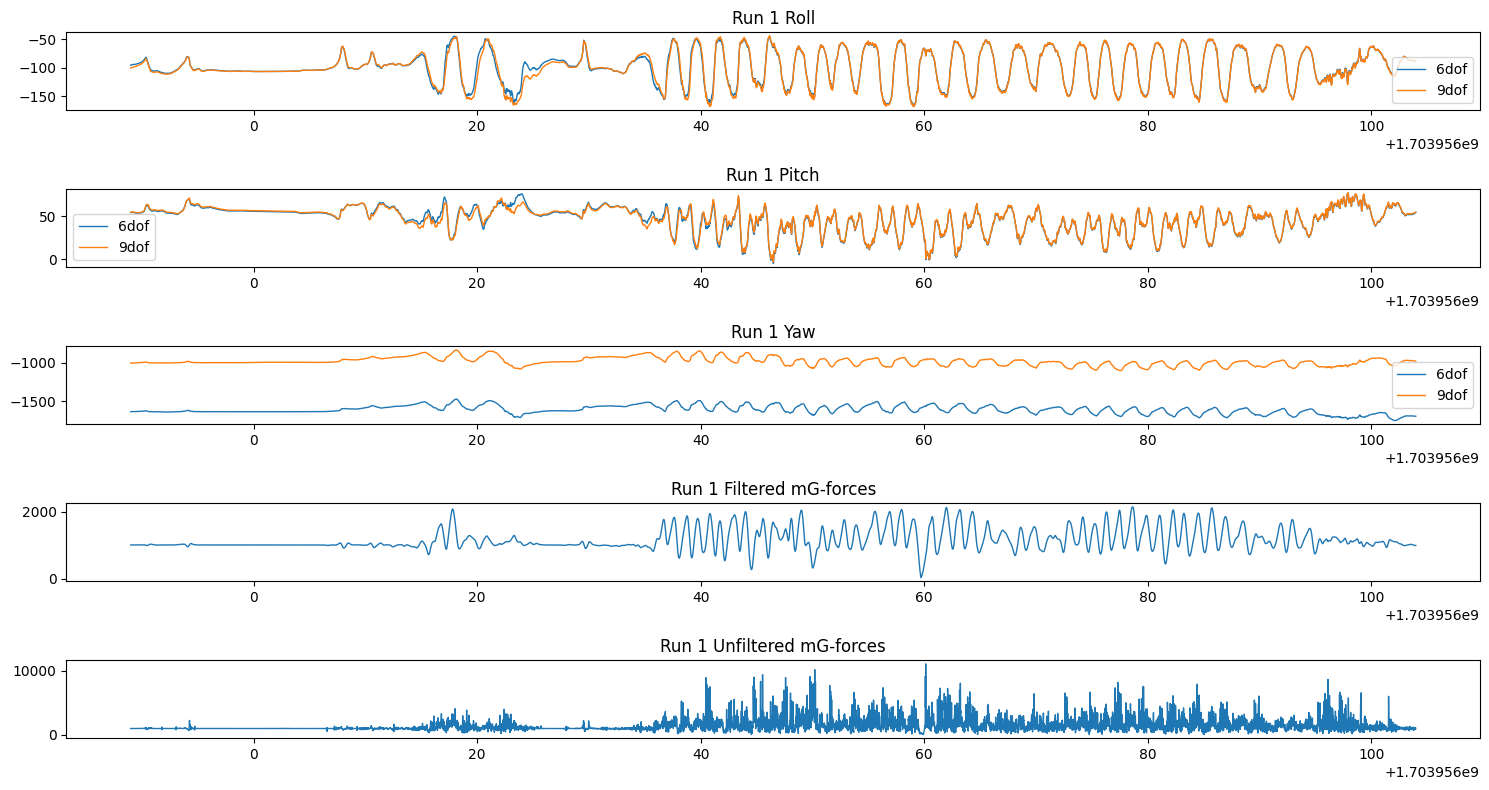

In [136]:
plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(5, figsize=(15, 8))

ax[0].plot(run1.time, run1.euler6[:, 0], label='6dof')
ax[0].plot(run1.time, run1.euler9[:, 0], label='9dof')
ax[0].set_title('Run 1 Roll', wrap=True)
ax[0].legend()

ax[1].plot(run1.time, run1.euler6[:, 1], label='6dof')
ax[1].plot(run1.time, run1.euler9[:, 1], label='9dof')
ax[1].set_title('Run 1 Pitch', wrap=True)
ax[1].legend()

ax[2].plot(run1.time, run1.euler6[:, 2], label='6dof')
ax[2].plot(run1.time, run1.euler9[:, 2], label='9dof')
ax[2].set_title('Run 1 Yaw', wrap=True)
ax[2].legend()

ax[3].plot(run1.time, run1.mG_lpf())
ax[3].set_title('Run 1 Filtered mG-forces', wrap=True)

ax[4].plot(run1.time, run1.mG)
ax[4].set_title('Run 1 Unfiltered mG-forces', wrap=True)

plt.tight_layout()
plt.show()

## Identifying the Still Points

Maintain a causal design!

In [137]:
_, _, _, tile_2023_12_30 = load_2023_12_30(split_tile=False)

A50 Downhill Tracks
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Downhill | Date 2023-12-30 | Time 12:18:53 | Duration [s] 114 | Length [m] 1032
	 Track type Downhill | Date 2023-12-30 | Time 12:21:47 | Duration [s] 40 | Length [m] 111
A50 All Tracks
	 Track type Hold | Date 2023-12-30 | Time 11:52:15 | Duration [s] 110 | Length [m] 36
	 Track type Walk | Date 2023-12-30 | Time 11:54:05 | Duration [s] 103 | Length [m] 56
	 Track type Hold | Date 2023-12-30 | Time 11:55:48 | Duration [s] 74 | Length [m] 22
	 Track type Walk | Date 2023-12-30 | Time 11:57:02 | Duration [s] 82 | Length [m] 53
	 Track type Lift | Date 2023-12-30 | Time 11:58:24 | Duration [s] 485 | Length [m] 862
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Walk | Date 2023-12-30 | Time 12:08:24 | Duration [s] 92 | Length [m] 75
	 Track type Lift | Date 2023-12-30 | Time 12:09:56 | Duration [s] 410 | Leng

In [138]:
a50_lifts = [track for track in a50_all_2023_12_30 if track.track_type == "Lift"]

### Reprenting Lift and Ski Zones

In [139]:
def addRunAndLiftZones(ax, runs, lifts):
    [ax.axvspan(run.time[0], run.time[-1], color='green', alpha=0.25) for run in runs]
    [ax.axvspan(lift.time[0], lift.time[-1], color='red', alpha=0.25) for lift in lifts]

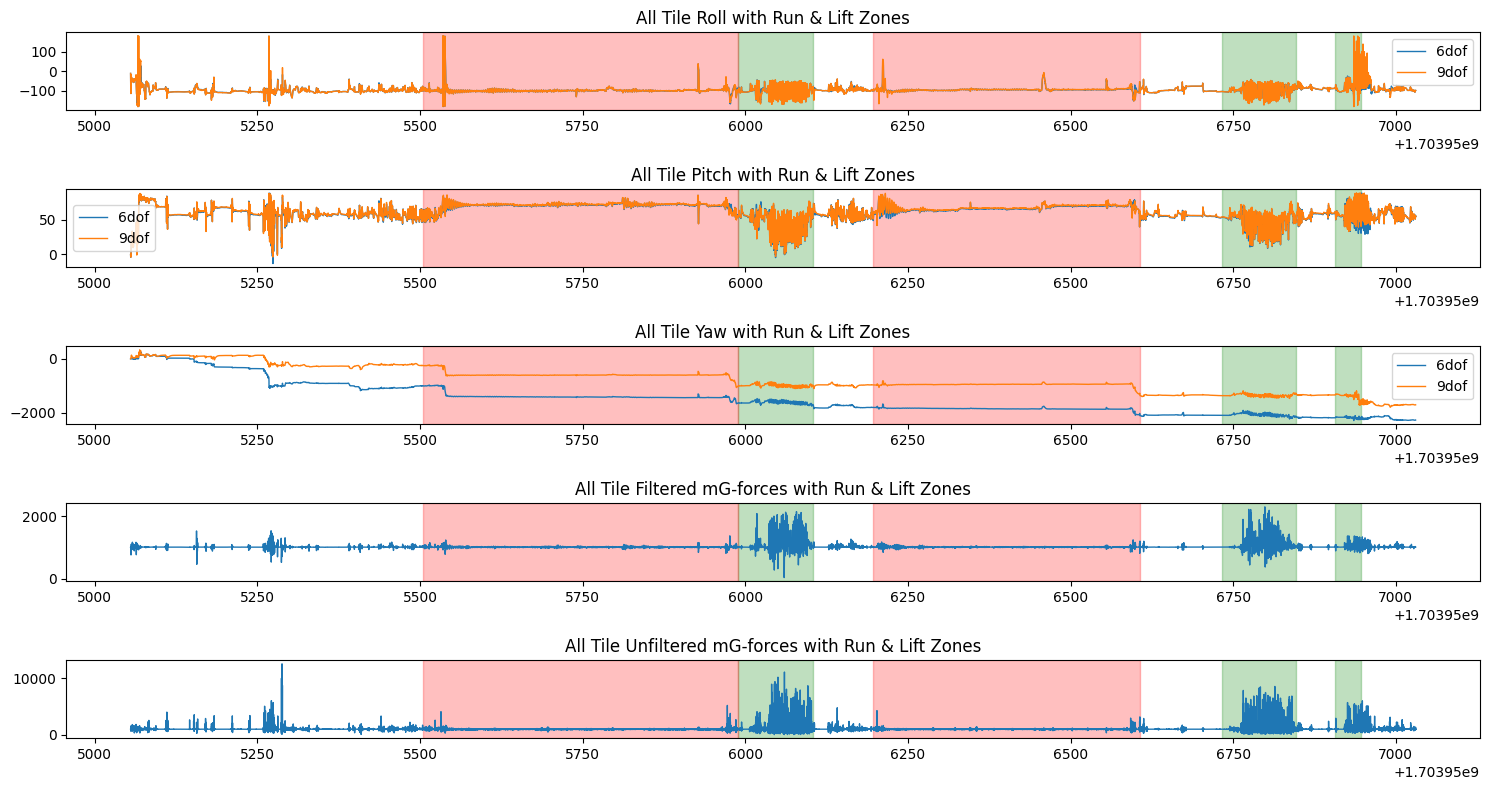

In [140]:
plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(5, figsize=(15, 8))

ax[0].plot(tile_2023_12_30.time, tile_2023_12_30.euler6[:, 0], label='6dof')
ax[0].plot(tile_2023_12_30.time, tile_2023_12_30.euler9[:, 0], label='9dof')
addRunAndLiftZones(ax[0], tile_2023_12_30_runs, a50_lifts)
ax[0].set_title('All Tile Roll with Run & Lift Zones', wrap=True)
ax[0].legend()

ax[1].plot(tile_2023_12_30.time, tile_2023_12_30.euler6[:, 1], label='6dof')
ax[1].plot(tile_2023_12_30.time, tile_2023_12_30.euler9[:, 1], label='9dof')
addRunAndLiftZones(ax[1], tile_2023_12_30_runs, a50_lifts)
ax[1].set_title('All Tile Pitch with Run & Lift Zones', wrap=True)
ax[1].legend()

ax[2].plot(tile_2023_12_30.time, tile_2023_12_30.euler6[:, 2], label='6dof')
ax[2].plot(tile_2023_12_30.time, tile_2023_12_30.euler9[:, 2], label='9dof')
addRunAndLiftZones(ax[2], tile_2023_12_30_runs, a50_lifts)
ax[2].set_title('All Tile Yaw with Run & Lift Zones', wrap=True)
ax[2].legend()

ax[3].plot(tile_2023_12_30.time, tile_2023_12_30.mG_lpf())
addRunAndLiftZones(ax[3], tile_2023_12_30_runs, a50_lifts)
ax[3].set_title('All Tile Filtered mG-forces with Run & Lift Zones', wrap=True)

ax[4].plot(tile_2023_12_30.time, tile_2023_12_30.mG)
addRunAndLiftZones(ax[4], tile_2023_12_30_runs, a50_lifts)
ax[4].set_title('All Tile Unfiltered mG-forces with Run & Lift Zones', wrap=True)

plt.tight_layout()
plt.show()

### At the Point of Lift Liftoff

Taking a closer look at the start of the lift zone, starting with the first lift:

In [141]:
start = tile_2023_12_30.time.index(a50_lifts[0].time[0])
x1 = start - 2500 # sub time to window
x2 = start + 2500 # add time to window
print(x1, x2)

42400 47400


In [142]:
impact_idx = maxIndex(tile_2023_12_30.mG, [x1, x2])

In [143]:
def plotEulerAndGs(x1, x2):
    plt.rc('lines', linewidth=1)
    fig, ax = plt.subplots(6, figsize=(14, 9))

    ax[0].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.corrected_alt[x1:x2], label='tile')
    ax[0].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[0].set_title('Moment of Lift 1 Liftoff Tile Altitude (Correced from A50)', wrap=True)
    ax[0].legend()

    ax[1].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler6[x1:x2, 0], label='6dof')
    ax[1].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler9[x1:x2, 0], label='9dof')
    ax[1].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[1].set_title('Moment of Lift 1 Liftoff Tile Roll', wrap=True)
    ax[1].legend()

    ax[2].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler6[x1:x2, 1], label='6dof')
    ax[2].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler9[x1:x2, 1], label='9dof')
    ax[2].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[2].set_title('Moment of Lift 1 Liftoff Tile Pitch', wrap=True)
    ax[2].legend()

    ax[3].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler6[x1:x2, 2], label='6dof')
    ax[3].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler9[x1:x2, 2], label='9dof')
    ax[3].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[3].set_title('Moment of Lift 1 Liftoff Tile Yaw', wrap=True)
    ax[3].legend()

    ax[4].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.mG_lpf()[x1:x2])
    ax[4].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[4].set_title('Moment of Lift 1 Liftoff Tile Filtered mG-forces', wrap=True)

    ax[5].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.mG[x1:x2])
    ax[5].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[5].set_title('Moment of Lift 1 Liftoff Tile Unfiltered mG-forces', wrap=True)

    plt.tight_layout()
    plt.show()

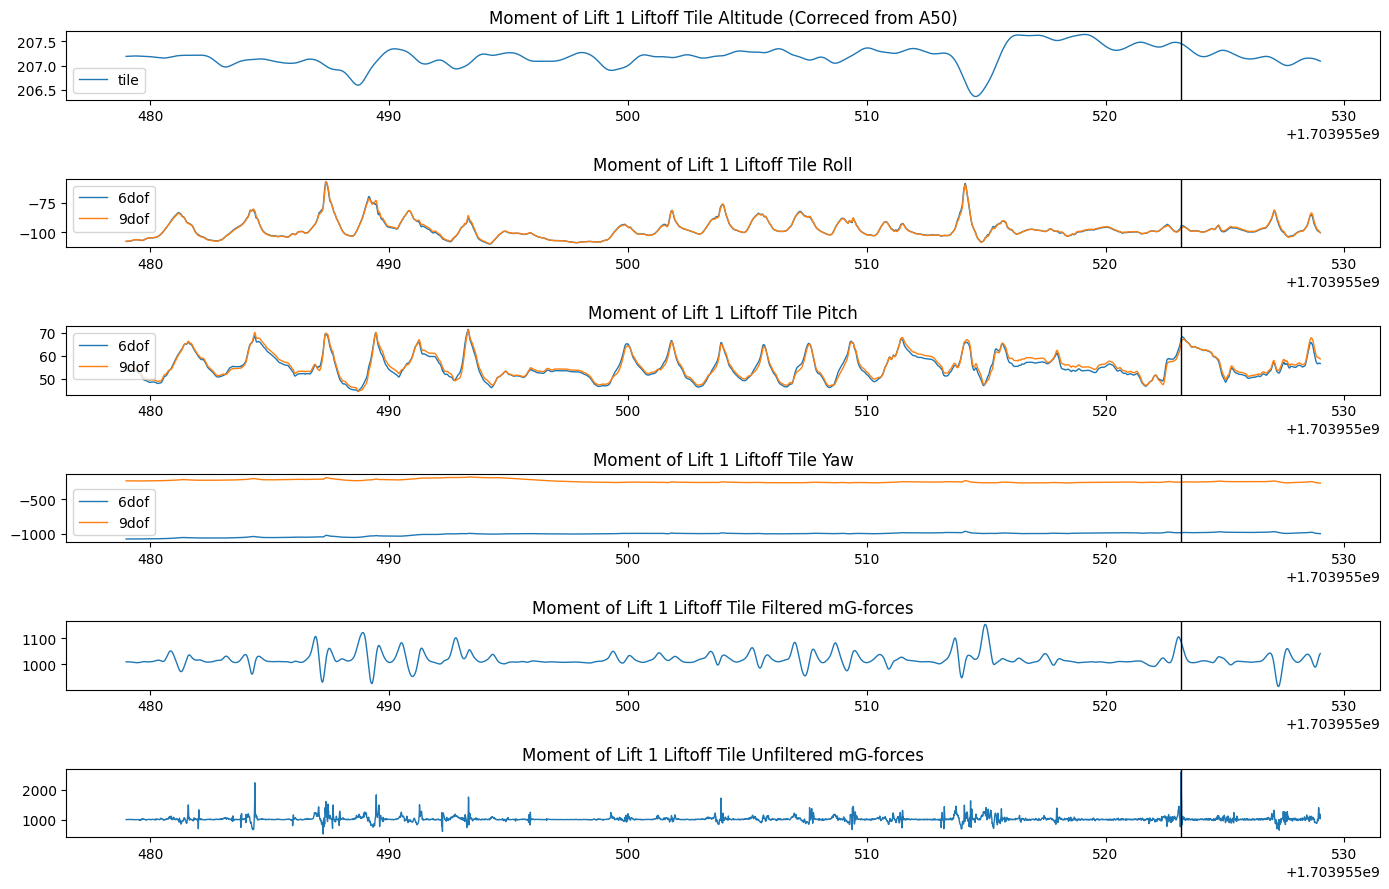

In [144]:
plotEulerAndGs(x1, x2)

#### Analysis

- the first flat period is waiting in line for the gate to open, not always available
- the second is standing waiting for the lift to hit the legs, seen by the impulse in the unfiltered mG-forces
  - motion during this time may happen, only correct for times it doesn't since this will always happen

### At the Point of Lift Landing

Taking a closer look at the end of the lift zone, starting with the first lift:

90900 95900


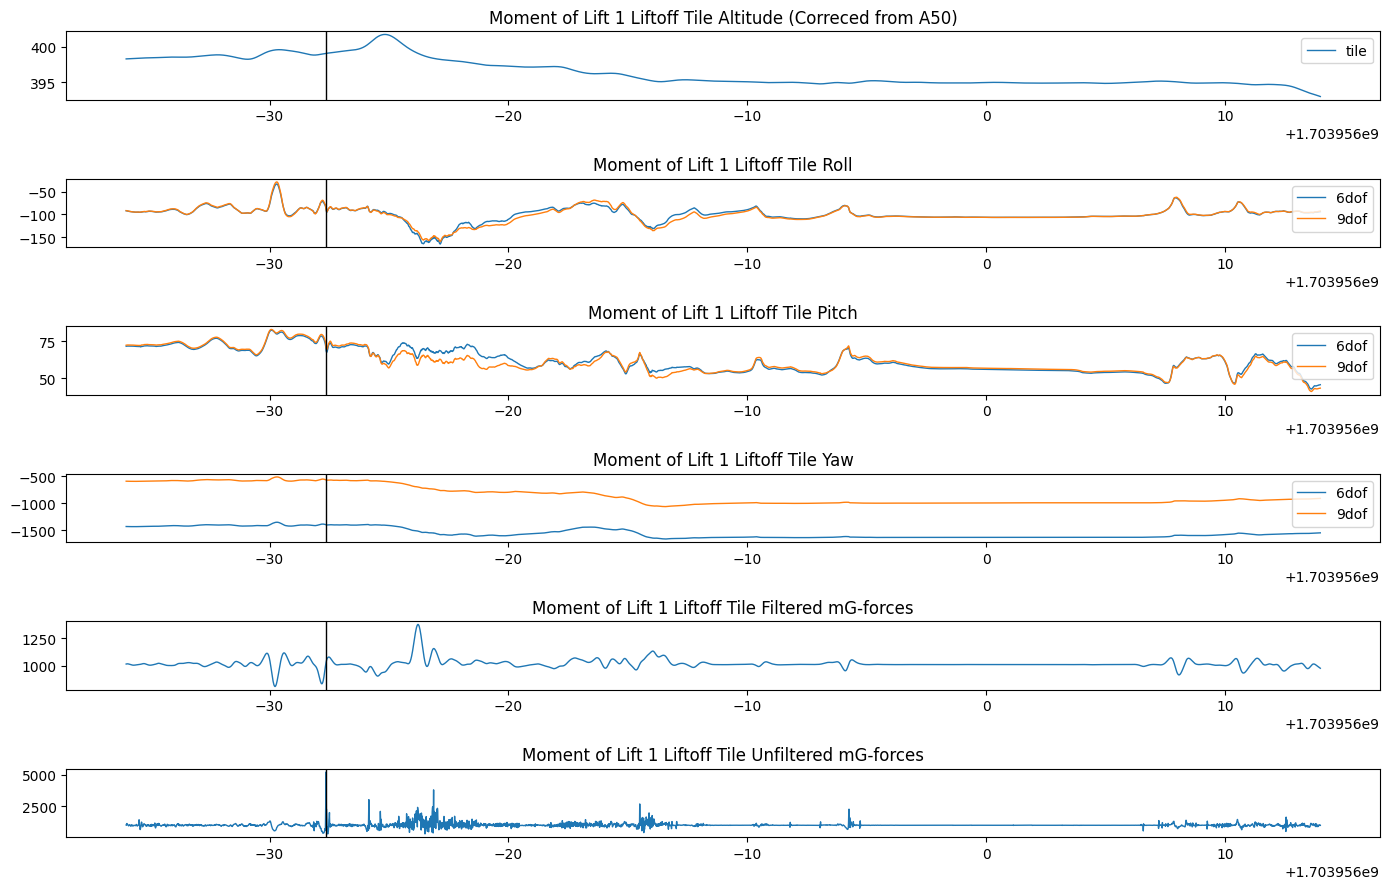

In [145]:
stop = tile_2023_12_30.time.index(a50_lifts[0].time[-1])
x1 = stop - 2500 # sub time to window
x2 = stop + 2500 # add time to window
print(x1, x2)
impact_idx = maxIndex(tile_2023_12_30.mG, [x1, x2])
plotEulerAndGs(x1, x2)

#### Analysis

- the main flat period is seen as the point where the chair is pushing you while your skis are flat on the platform
- results in a pretty good steady state for all signals!

#### Confirming this Occurs on the Next Chair Landing

152600 157600


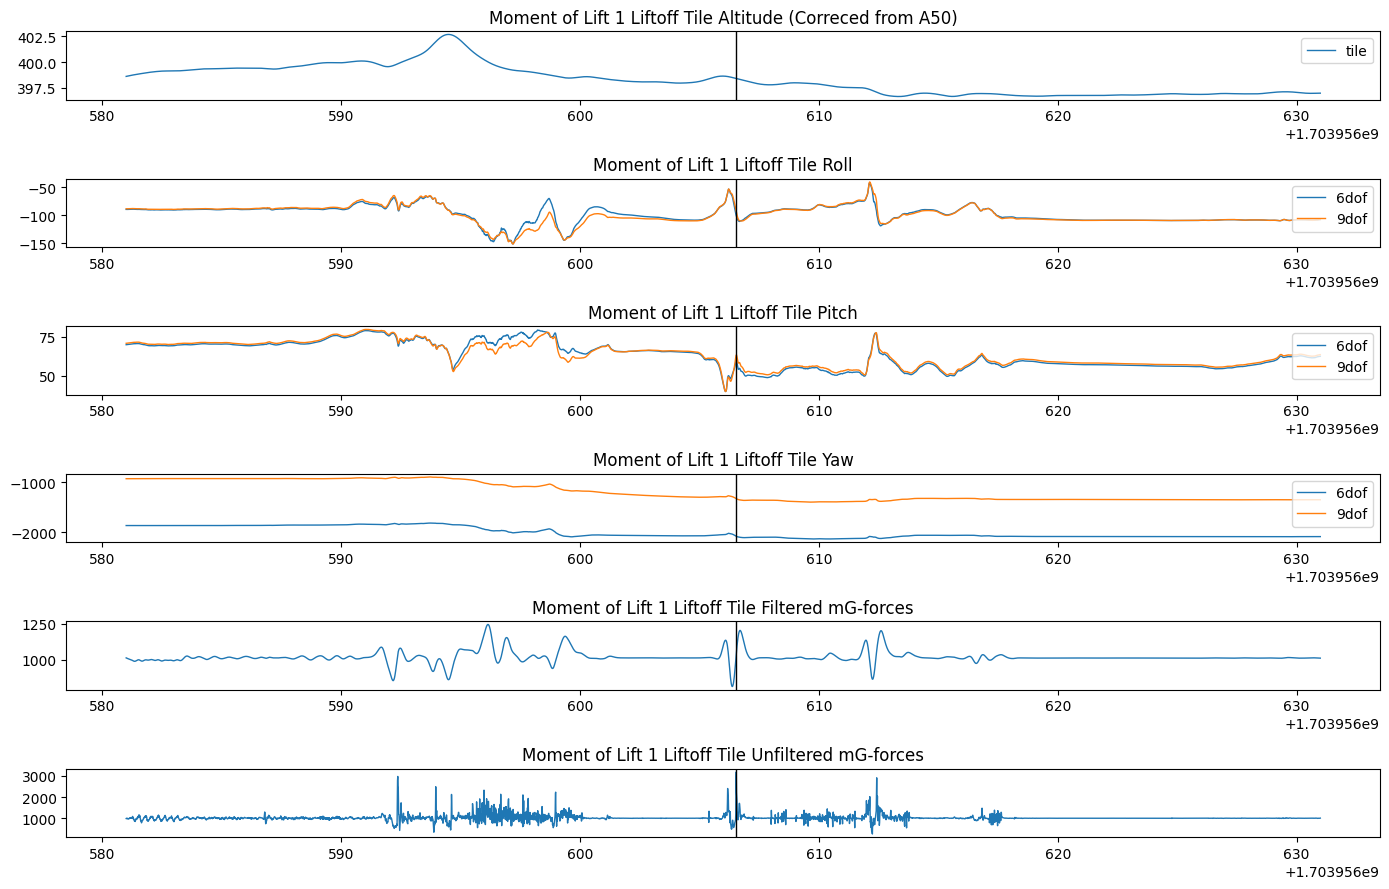

In [146]:
stop = tile_2023_12_30.time.index(a50_lifts[1].time[-1])
x1 = stop - 2500 # sub time to window
x2 = stop + 2500 # add time to window
print(x1, x2)
impact_idx = maxIndex(tile_2023_12_30.mG, [x1, x2])
plotEulerAndGs(x1, x2)

## Identification Steps

### v1

0. must first be in lift state, identified by constant acc (& vel), and increasing altitude
1. triggered by altitude & when it begins decreasing from its max
2. search all signals in +t until a medium window has a low enough std dev
3. confirm an impact in the unfiltered mG was observed, to isolate the cases where the chair stopped
4. confirm altitude never increses, otherwise break
5. capture signals during a small window of low std dev, stretching to the length of time SS is observed

In [191]:
from numpy import std
# from signal_processing import std

def testMotionForStillness(tile, r):
    # alt_lpf_std_th = 3
    # roll_std_th = 5
    # pitch_std_th = 5
    # yaw_std_th = 5
    euler_std_th = 3
    # mG_lpf_std_th = 25
    mG_std_th = 50
    return [
        # std(tile.corrected_alt[r[0]:r[1]]) < alt_lpf_std_th,
        # std(tile.euler9[r[0]:r[1], 0]) < roll_std_th,
        # std(tile.euler9[r[0]:r[1], 1]) < pitch_std_th,
        # std(tile.euler9[r[0]:r[1], 2]) < yaw_std_th,
        std(tile.euler9_length[r[0]:r[1]]) < euler_std_th,
        # std(tile.mG_lpf()[r[0]:r[1]]) < mG_lpf_std_th,
        std(tile.mG[r[0]:r[1]]) < mG_std_th,
    ]

In [223]:
def identifyStillRanges(tile: Tile, min_s=6, r=[0, -1], print_out=False):
    """Identifies ranges of still motion with sampling length `min_s` in seconds
    and returns them as a list of lists representing their indices.
    """
    wsamples = min_s * 100
    search = (len(tile.time[r[0]:r[1]])) - wsamples
    coarse_mult = wsamples
    fine_mult = round(coarse_mult / 10)
    still_ranges = []
    prev_tail = r[0]
    print('search:', search)
    print('coarse_mult:', coarse_mult)
    print('fine_mult:', fine_mult)

    for i in range(search):
        if print_out: print('i iter:\t', i)
        for j in range(search):
            # coarse search every 10th idx
            head = prev_tail + coarse_mult * j
            tail = head + wsamples
            
            if tail >= search + r[0]:
                if print_out: print('hit the end of the line. tail >= search:', tail, '>=', search + r[0])
                return still_ranges
            
            trailing_tests = testMotionForStillness(tile, [head, tail])

            if print_out: print('j iter:\t', j)
            if print_out: print('head = prev_tail + coarse_mult * j:\t', head, '=', prev_tail, '+', coarse_mult * j)
            if print_out: print('tail = head + wsamples:\t', tail, '=', head, '+', wsamples)
            if print_out: print('still_tests:\t', trailing_tests)
            
            if sum(trailing_tests) == len(trailing_tests):
                if print_out: print('\tcoarse range found:\t', head, tail)
                refinedHead = None
                refinedTail = None
                for k in range(search - j):
                    # fine search every idx
                    fine_leading_head = head - fine_mult * (k + 1)
                    fine_leading_tail = tail - fine_mult * (k + 1)
                    fine_trailing_head = head + fine_mult * (k + 1)
                    fine_trailing_tail = tail + fine_mult * (k + 1)

                    if print_out: print('\tk iter:\t', k)
                    if print_out: print('\tfine_leading_head = head - fine_mult * k + 1:\t', fine_leading_head, '=', head, '-', fine_mult, '*', (k + 1))
                    if print_out: print('\tfine_leading_tail = tail - fine_mult * k + 1:\t', fine_leading_tail, '=', tail, '-', fine_mult, '*', (k + 1))
                    if print_out: print('\tfine_trailing_head = head + fine_mult * k + 1:\t', fine_trailing_head, '=', head, '+', fine_mult, '*', (k + 1))
                    if print_out: print('\tfine_trailing_tail = tail + fine_mult * k + 1:\t', fine_trailing_tail, '=', tail, '+', fine_mult, '*', (k + 1))

                    if refinedHead is None:
                        if fine_leading_head <= 0:
                            refinedHead = 0
                            print('\t\trefined head set:\t', refinedHead)
                        
                        leading_tests = testMotionForStillness(tile, [fine_leading_head, fine_leading_tail])
                        if print_out: print('\tleading_tests:\t', leading_tests)

                        if sum(leading_tests) < len(leading_tests):
                            refinedHead = fine_leading_head + fine_mult
                            print('\t\trefined head set:\t', refinedHead)

                    if refinedTail is None:
                        if fine_trailing_tail >= search:
                            refinedTail = fine_trailing_tail
                            print('\t\trefined tail set:\t', refinedTail)

                        trailing_tests = testMotionForStillness(tile, [fine_trailing_head, fine_trailing_tail])
                        if print_out: print('\ttrailing_tests:\t', trailing_tests)

                        if sum(trailing_tests) < len(trailing_tests):
                            refinedTail = fine_trailing_tail - fine_mult
                            if print_out: print('\t\trefined tail set:\t', refinedTail)

                    if refinedHead is not None and refinedTail is not None:
                        if refinedHead <= prev_tail:
                            if print_out: print('\t\tstitched to previous set:\t', [still_ranges[-1][0], refinedTail])
                            still_ranges[-1] = [still_ranges[-1][0], refinedTail]
                        else:
                            if print_out: print('\t\trefined still range set:\t', [refinedHead, refinedTail])
                            still_ranges.append([refinedHead, refinedTail])
                        prev_tail = refinedTail
                        break
                break

In [149]:
r = [0, len(tile_2023_12_30.time)]
still_ranges = identifyStillRanges(tile_2023_12_30, r=r, print_out=True)

search: 196947
coarse_mult: 600
fine_mult: 60
i iter:	 0
j iter:	 0
head = prev_tail + coarse_mult * j:	 0 = 0 + 0
tail = head + wsamples:	 600 = 0 + 600
still_tests:	 [False, False]
j iter:	 1
head = prev_tail + coarse_mult * j:	 600 = 0 + 600
tail = head + wsamples:	 1200 = 600 + 600
still_tests:	 [False, False]
j iter:	 2
head = prev_tail + coarse_mult * j:	 1200 = 0 + 1200
tail = head + wsamples:	 1800 = 1200 + 600
still_tests:	 [False, False]
j iter:	 3
head = prev_tail + coarse_mult * j:	 1800 = 0 + 1800
tail = head + wsamples:	 2400 = 1800 + 600
still_tests:	 [False, True]
j iter:	 4
head = prev_tail + coarse_mult * j:	 2400 = 0 + 2400
tail = head + wsamples:	 3000 = 2400 + 600
still_tests:	 [False, False]
j iter:	 5
head = prev_tail + coarse_mult * j:	 3000 = 0 + 3000
tail = head + wsamples:	 3600 = 3000 + 600
still_tests:	 [False, True]
j iter:	 6
head = prev_tail + coarse_mult * j:	 3600 = 0 + 3600
tail = head + wsamples:	 4200 = 3600 + 600
still_tests:	 [False, False]
j iter

In [150]:
print(len(still_ranges), "still points:", still_ranges)

22 still points: [[6420, 9060], [10680, 11460], [13680, 15540], [16440, 18120], [19200, 20400], [31140, 31980], [32100, 33300], [71880, 72900], [80940, 82680], [83100, 84060], [85680, 86940], [122340, 123000], [123780, 125760], [137760, 138360], [138900, 139620], [142140, 143280], [144960, 147000], [147660, 149940], [158460, 159780], [162600, 164760], [167340, 168420], [184500, 185220]]


In [151]:
def addStillZones(ax, t, ranges, r):
    for range in ranges:
        if range[0] < r[0] or range[1] > r[1]: 
            continue
        ax.axvspan(t[range[0]], t[range[1]], color='green', alpha=0.25)

In [152]:
def plotTileWithStillZones(tile, r=r, still_ranges=still_ranges):
    plt.rc('lines', linewidth=1)
    fig, ax = plt.subplots(6, figsize=(15, 10))

    ax[0].plot(tile.time[r[0]:r[1]], tile.corrected_alt[r[0]:r[1]])
    addStillZones(ax[0], tile.time, still_ranges, r)
    ax[0].set_title('All Tile Altitude with Still Zones', wrap=True)

    ax[1].plot(tile.time[r[0]:r[1]], tile.euler6[r[0]:r[1], 0], label='6dof')
    ax[1].plot(tile.time[r[0]:r[1]], tile.euler9[r[0]:r[1], 0], label='9dof')
    addStillZones(ax[1], tile.time, still_ranges, r)
    ax[1].set_title('All Tile Roll with Still Zones', wrap=True)
    ax[1].legend()

    ax[2].plot(tile.time[r[0]:r[1]], tile.euler6[r[0]:r[1], 1], label='6dof')
    ax[2].plot(tile.time[r[0]:r[1]], tile.euler9[r[0]:r[1], 1], label='9dof')
    addStillZones(ax[2], tile.time, still_ranges, r)
    ax[2].set_title('All Tile Pitch with Still Zones', wrap=True)
    ax[2].legend()

    ax[3].plot(tile.time[r[0]:r[1]], tile.euler6[r[0]:r[1], 2], label='6dof')
    ax[3].plot(tile.time[r[0]:r[1]], tile.euler9[r[0]:r[1], 2], label='9dof')
    addStillZones(ax[3], tile.time, still_ranges, r)
    ax[3].set_title('All Tile Yaw with Still Zones', wrap=True)
    ax[3].legend()

    ax[4].plot(tile.time[r[0]:r[1]], tile.mG_lpf()[r[0]:r[1]])
    addStillZones(ax[4], tile.time, still_ranges, r)
    ax[4].set_title('All Tile Filtered mG-forces with Still Zones', wrap=True)

    ax[5].plot(tile.time[r[0]:r[1]], tile.mG[r[0]:r[1]])
    addStillZones(ax[5], tile.time, still_ranges, r)
    ax[5].set_title('All Tile Unfiltered mG-forces with Still Zones', wrap=True)

    plt.tight_layout()
    plt.show()

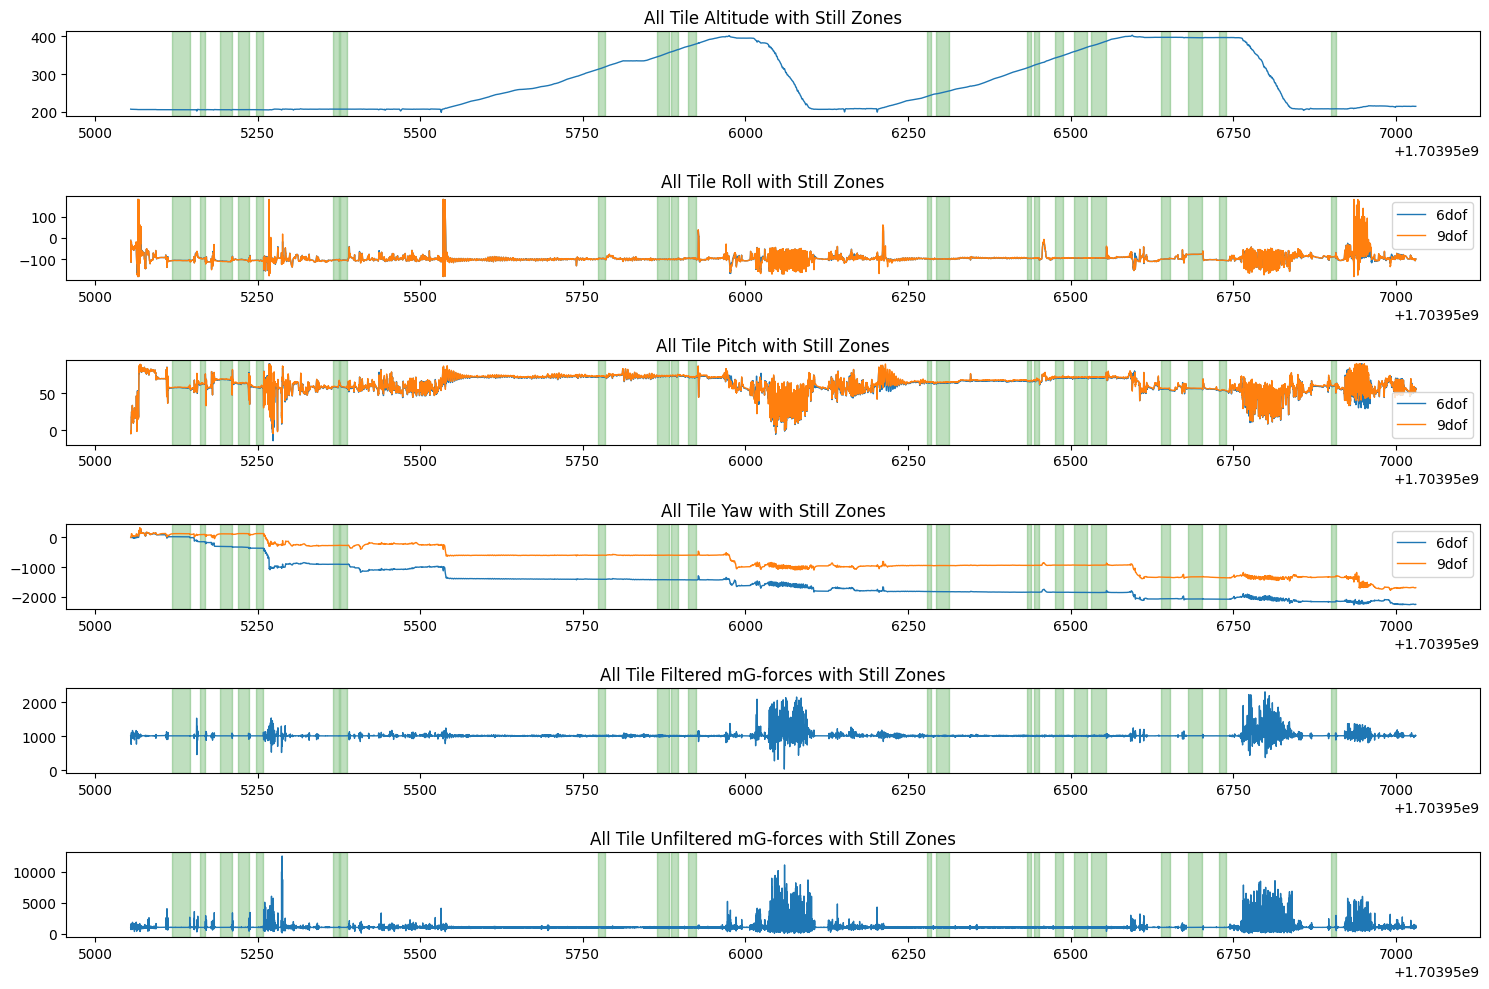

Max alt occurs at: 91983


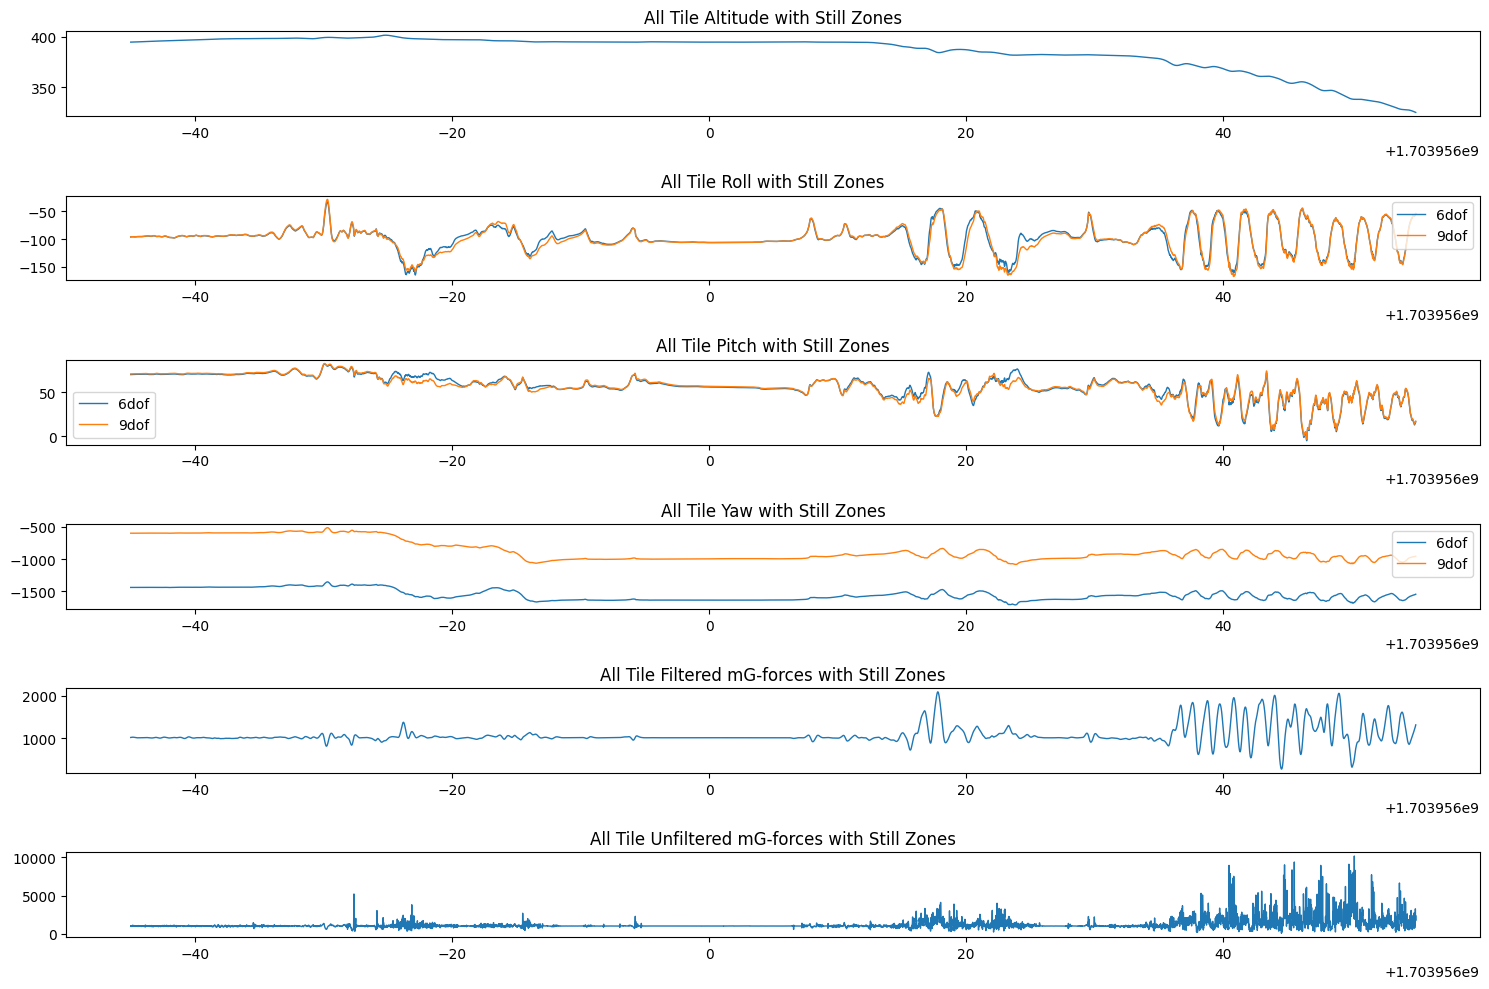

Max alt occurs at: 153949


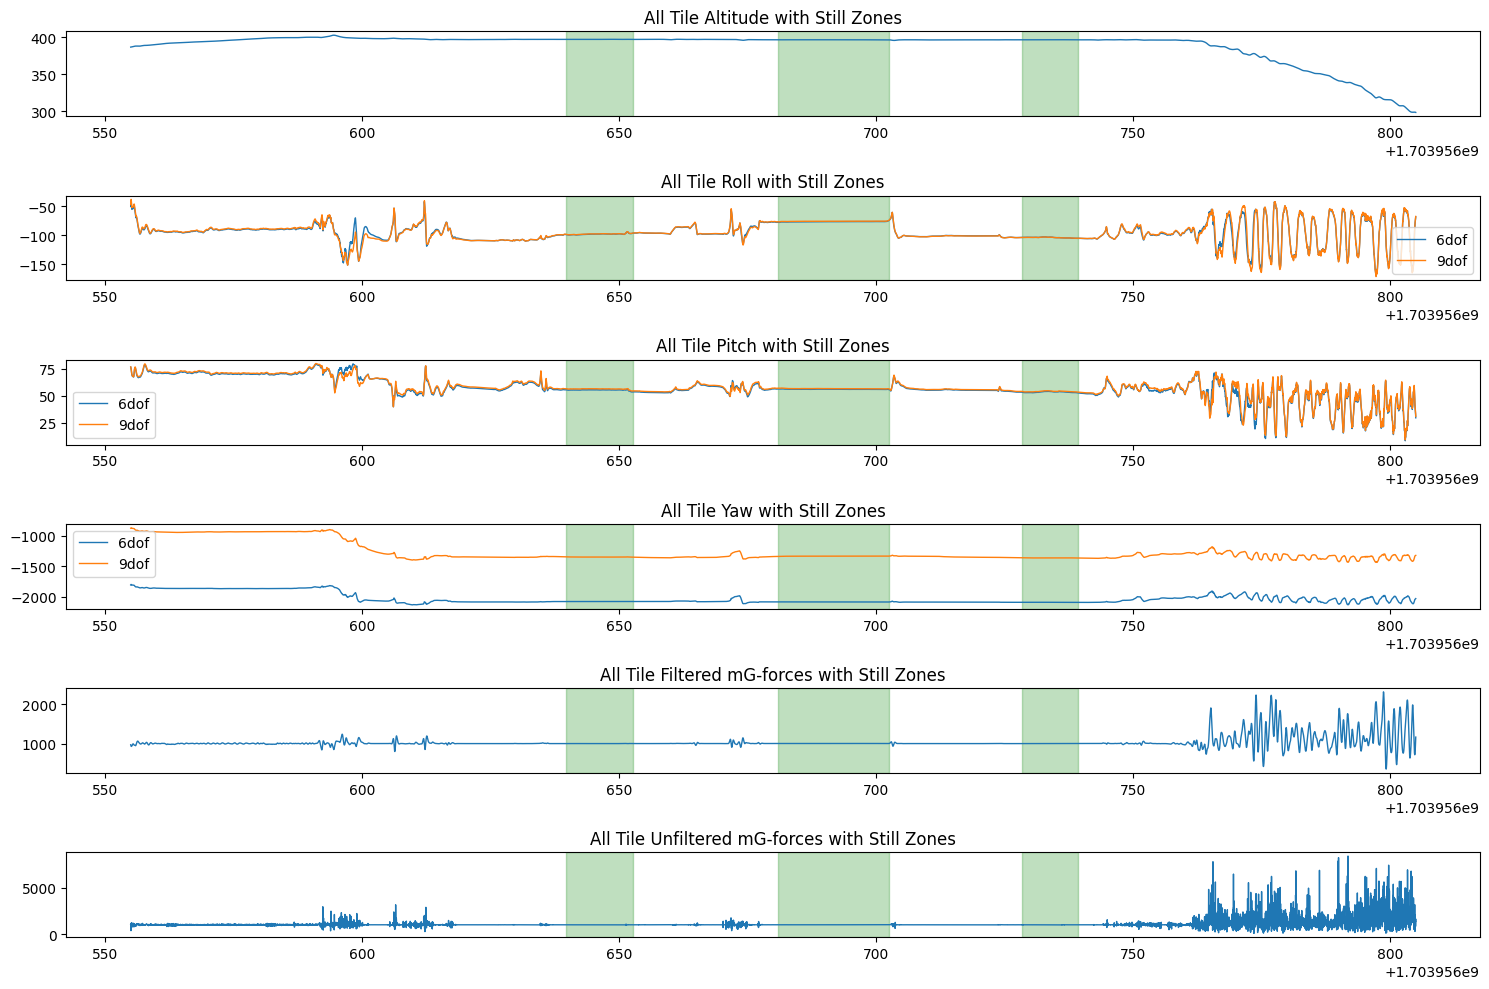

In [153]:
plotTileWithStillZones(tile_2023_12_30)
print('Max alt occurs at:', tile_2023_12_30.corrected_alt.index(max(tile_2023_12_30.corrected_alt[90000:100000])))
plotTileWithStillZones(tile_2023_12_30, [90000, 100000])
print('Max alt occurs at:', tile_2023_12_30.corrected_alt.index(max(tile_2023_12_30.corrected_alt[150000:160000])))
plotTileWithStillZones(tile_2023_12_30, [150000, 175000])

#### Check for Peak Altitude before `still_range`

- search back from `head` until `prev_tail` for an impulse(s) in mG and max in alt
  - confirm the alt at the current `head` is lower
- in a much larger range, confirm the the previous max alt seen before current `head` and `prev_tail` has been the max for a while
  - the "moving" max, account for lift stops

In [154]:
from stat_tests import StatTests as ST

def testContainsLocalPeak(x, r, print_out=False, header=""):
    """tests the input `x` signal for a peak inside the range `r`, excluding the endponits.
    
    if so, returns `True` else `False`
    """
    window, isValid = ST.assertWindow(x, r)
    if not isValid:
        return False

    max_window = max(window)
    head = x[r[0]]
    tail = x[r[1]]
    if print_out: print('\t', head, ' < ', max_window, ' < ', tail, '?', sep='')
    if head < max_window and max_window > tail:
        return True
    return False


def testLargeImpulse(x, r, th=None, print_out=False, header=""):
    """tests the input `x` signal whether a large impulse occured during the range `r`.
    
    `th` will override the threshold of the impulse magnitude test, defaults to 3 * stddev
    """
    window, isValid = ST.assertWindow(x, r)
    if not isValid:
        return False
    
    baseline = 3 * std(window) if th is None else th
    impulse = max(window)
    if print_out: print('\t', impulse, ' > ', baseline, '?', sep='')
    if impulse > baseline:
        return True
    return False


# def test

In [155]:
# create IC
prev_tail = 0

for still_range in still_ranges:
    testing_range = [prev_tail, still_range[0]]
    print(testing_range)

    if testContainsLocalPeak(tile_2023_12_30.corrected_alt, testing_range, print_out=True):
        print('\tcontains alt peak?', True)
    else:
        print('\tcontains alt peak?', False)

    if testLargeImpulse(tile_2023_12_30.corrected_alt, testing_range, th=2+tile_2023_12_30.corrected_alt[testing_range[1]], print_out=True):
        print('\tcontains alt impulse?', True)
    else:
        print('\tcontains alt impulse?', False)

    if testLargeImpulse(tile_2023_12_30.mG, testing_range, print_out=True):
        print('\tcontains mG impulse?', True)
    else:
        print('\tcontains mG impulse?', False)

    # update the tail for the next search
    prev_tail = still_range[1]

[0, 6420]
	207.21547319515258 < 207.21547319515258 < 205.89204891706083?
	contains alt peak? False
	207.21547319515258 > 207.89204891706083?
	contains alt impulse? False
	4025.1078246427137 > 363.0423001060833?
	contains mG impulse? True
[9060, 10680]
	205.90370482636365 < 206.55833073163194 < 205.75307654532406?
	contains alt peak? True
	206.55833073163194 > 207.75307654532406?
	contains alt impulse? False
	3563.458151851934 > 590.571718558312?
	contains mG impulse? True
[11460, 13680]
	205.79450455023544 < 206.12746922451169 < 205.7300762886914?
	contains alt peak? True
	206.12746922451169 > 207.7300762886914?
	contains alt impulse? False
	3392.6116783386806 > 446.19927141888104?
	contains mG impulse? True
[15540, 16440]
	205.40218530675355 < 206.10706968230573 < 205.8048119499577?
	contains alt peak? True
	206.10706968230573 > 207.8048119499577?
	contains alt impulse? False
	3358.5504313617207 > 351.9844172140387?
	contains mG impulse? True
[18120, 19200]
	205.73627469625512 < 206.0

### V2

0. run is triggered by parent device, store idx
1. search left from this point for the first max in alt
2. find the first still point after this max and before the lift start
3. use the avg inside this still point as the platform zone


In [156]:
run1_tile_start_idx = tile_2023_12_30.time.index(a50_2023_12_30[0].time[0])
print(run1_tile_start_idx)
run2_tile_start_idx = tile_2023_12_30.time.index(a50_2023_12_30[1].time[0])
print(run2_tile_start_idx)

93400
167800


In [157]:
def findFirstHistoricMax(x, end, th=2):
    x1 = 0
    for i in range(len(x[0:end])):
        if x[end - i] - x[end - (i + 1)] > th:
            x1 = end - (i + 1)
            break
    return maxIndex(x, [x1, end])

In [164]:
liftoff1_tile_idx = findFirstHistoricMax(tile_2023_12_30.corrected_alt, run1_tile_start_idx)
print(liftoff1_tile_idx)
liftoff2_tile_idx = findFirstHistoricMax(tile_2023_12_30.corrected_alt, run2_tile_start_idx)
print(liftoff2_tile_idx)

91983
153949


In [169]:
platform1_range = identifyStillRanges(tile_2023_12_30, r=[liftoff1_tile_idx, run1_tile_start_idx], min_s=1, print_out=True)
print('\n\nNumber of still ranges found:', len(platform1_range))

search: 1317
coarse_mult: 100
fine_mult: 10
i iter:	 0
j iter:	 0
head = prev_tail + coarse_mult * j:	 91983 = 91983 + 0
tail = head + wsamples:	 92083 = 91983 + 100
still_tests:	 [False, False]
j iter:	 1
head = prev_tail + coarse_mult * j:	 92083 = 91983 + 100
tail = head + wsamples:	 92183 = 92083 + 100
still_tests:	 [False, False]
j iter:	 2
head = prev_tail + coarse_mult * j:	 92183 = 91983 + 200
tail = head + wsamples:	 92283 = 92183 + 100
still_tests:	 [False, False]
j iter:	 3
head = prev_tail + coarse_mult * j:	 92283 = 91983 + 300
tail = head + wsamples:	 92383 = 92283 + 100
still_tests:	 [False, False]
j iter:	 4
head = prev_tail + coarse_mult * j:	 92383 = 91983 + 400
tail = head + wsamples:	 92483 = 92383 + 100
still_tests:	 [False, False]
j iter:	 5
head = prev_tail + coarse_mult * j:	 92483 = 91983 + 500
tail = head + wsamples:	 92583 = 92483 + 100
still_tests:	 [False, False]
j iter:	 6
head = prev_tail + coarse_mult * j:	 92583 = 91983 + 600
tail = head + wsamples:	 92

The `run1_tile_start_idx` isn't reliable and requires feedback from parent, non ideal...

### V3

0. Poll altitude at the start of a lift track
1. record when it starts decreasing past a certain threshold
2. wait for the first still point after this alt peak to define the platform zone
3. use the avg inside the platform zone

In [170]:
def getLiftPeakIdx(x, window_s=3*60, th=5, within_s=60):
    """Causal!
    
    Returns the index on input signal `x` where a max altitude is reached based on a
    drop detection within a certain period `within_s` seconds and threshold `th`.
    
    Confirms that this is a max over the last period `window_s` seconds."""
    fs = 100
    for i in range(len(x)):
        if i < window_s * fs:
            continue
        if x[i - (within_s * fs)] - x[i] > th and x[i - (within_s * fs)] == max(x[i - (window_s * fs):i]):
            return i - (within_s * fs)

In [171]:
max_lift1 = getLiftPeakIdx(tile_2023_12_30.corrected_alt)
max_lift2 = 100000 + getLiftPeakIdx(tile_2023_12_30.corrected_alt[100000:]) # represented as real-time

In [228]:
# wait for still point
# TODO write a more causal based algorithm to identify a rolling window, right now make an arbitrary window of + 10000 idx (10s)
platform1_ranges = identifyStillRanges(tile_2023_12_30, r=[max_lift1, max_lift1+10000], min_s=5, print_out=True)
platform2_ranges = identifyStillRanges(tile_2023_12_30, r=[max_lift2, max_lift2+10000], min_s=5, print_out=True)

platform1_lengths = [p[1] - p[0] for p in platform1_ranges]
still_idx_platform1 = maxIndex(platform1_lengths)
platform2_lengths = [p[1] - p[0] for p in platform2_ranges]
still_idx_platform2 = maxIndex(platform2_lengths)

print(still_idx_platform1)
print(still_idx_platform2)

platform1_range = platform1_ranges[still_idx_platform1]
platform2_range = platform2_ranges[still_idx_platform2]

search: 9500
coarse_mult: 500
fine_mult: 50
i iter:	 0
j iter:	 0
head = prev_tail + coarse_mult * j:	 91983 = 91983 + 0
tail = head + wsamples:	 92483 = 91983 + 500
still_tests:	 [False, False]
j iter:	 1
head = prev_tail + coarse_mult * j:	 92483 = 91983 + 500
tail = head + wsamples:	 92983 = 92483 + 500
still_tests:	 [False, False]
j iter:	 2
head = prev_tail + coarse_mult * j:	 92983 = 91983 + 1000
tail = head + wsamples:	 93483 = 92983 + 500
still_tests:	 [False, False]
j iter:	 3
head = prev_tail + coarse_mult * j:	 93483 = 91983 + 1500
tail = head + wsamples:	 93983 = 93483 + 500
still_tests:	 [False, False]
j iter:	 4
head = prev_tail + coarse_mult * j:	 93983 = 91983 + 2000
tail = head + wsamples:	 94483 = 93983 + 500
still_tests:	 [True, True]
	coarse range found:	 93983 94483
	k iter:	 0
	fine_leading_head = head - fine_mult * k + 1:	 93933 = 93983 - 50 * 1
	fine_leading_tail = tail - fine_mult * k + 1:	 94433 = 94483 - 50 * 1
	fine_trailing_head = head + fine_mult * k + 1:	

## Calculating the Rotation Matrix Based on the Still Range Averages



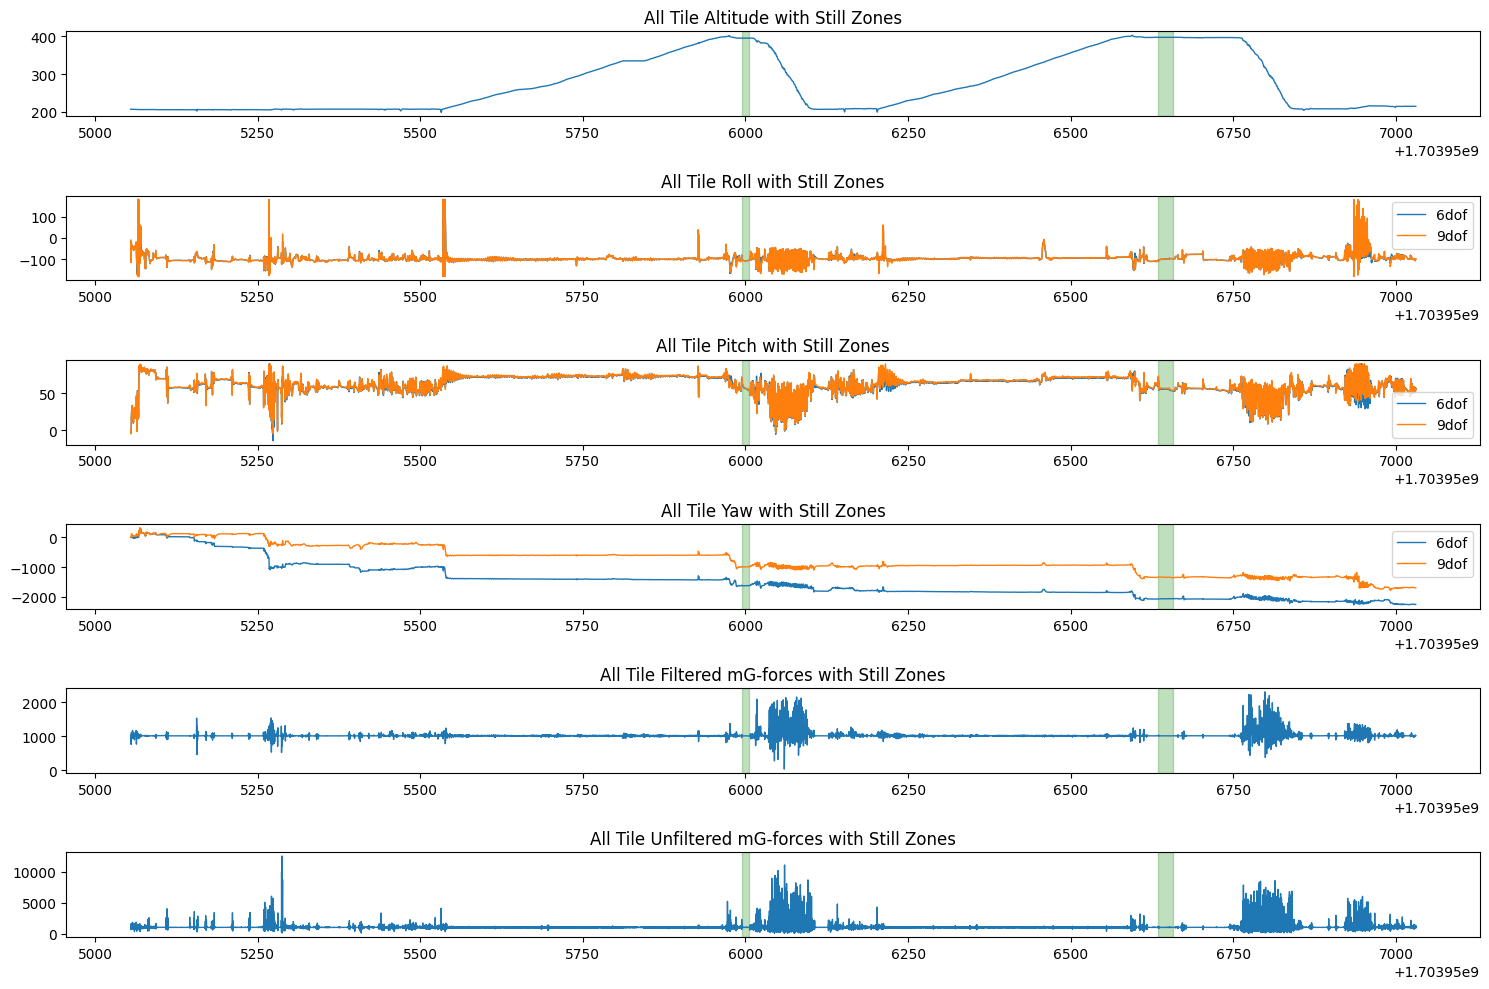

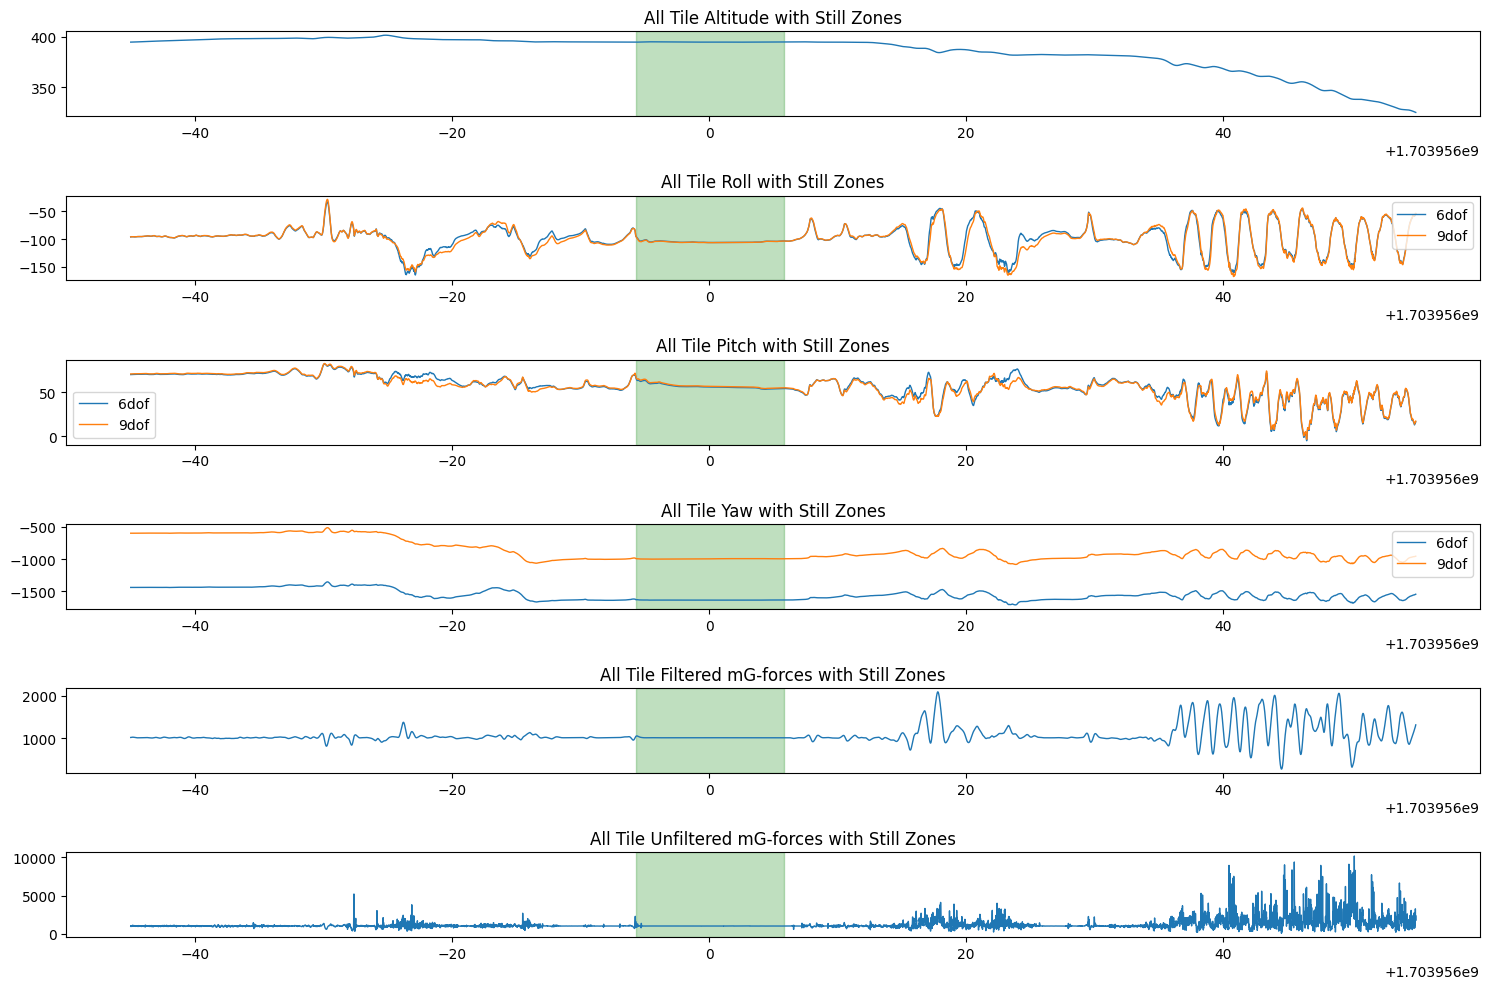

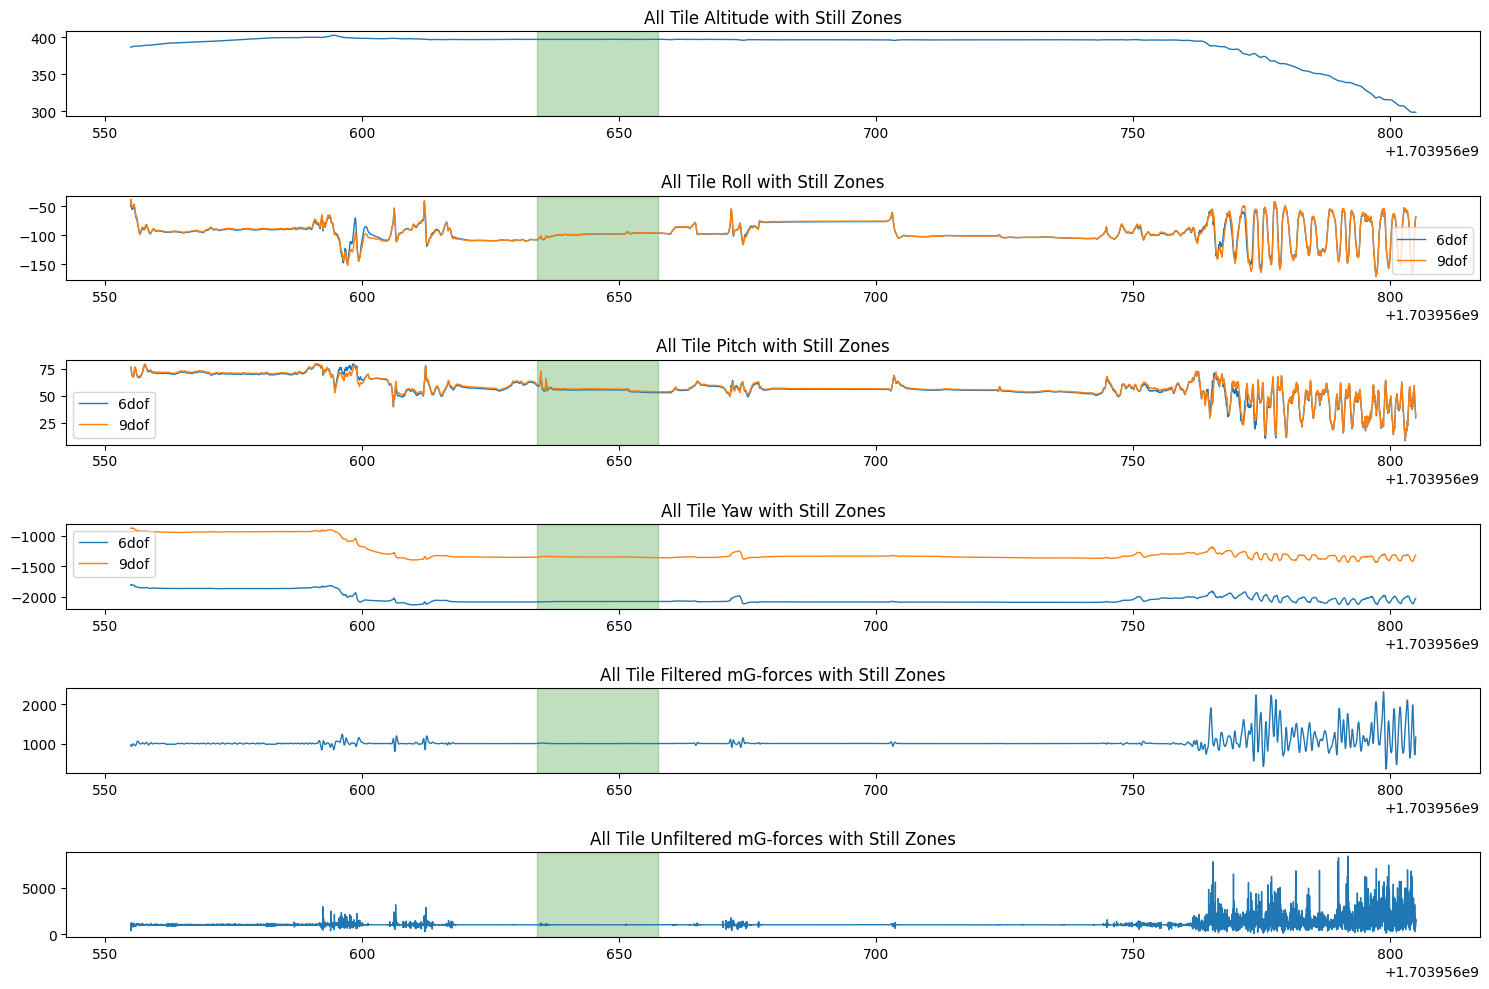

In [226]:
plotTileWithStillZones(tile_2023_12_30, still_ranges=[platform1_range, platform2_range])
plotTileWithStillZones(tile_2023_12_30, r=[90000, 100000], still_ranges=[platform1_range])
plotTileWithStillZones(tile_2023_12_30, r=[150000, 175000], still_ranges=[platform2_range])

In [234]:
from signal_processing import mean

r1_avg_roll = mean(tile_2023_12_30.euler9[platform1_range[0]:platform1_range[1], 0].tolist())
r1_avg_pitch = mean(tile_2023_12_30.euler9[platform1_range[0]:platform1_range[1], 1].tolist())
r1_avg_yaw = mean(tile_2023_12_30.euler9[platform1_range[0]:platform1_range[1], 2].tolist())
r2_avg_roll = mean(tile_2023_12_30.euler9[platform2_range[0]:platform2_range[1], 0].tolist())
r2_avg_pitch = mean(tile_2023_12_30.euler9[platform2_range[0]:platform2_range[1], 1].tolist())
r2_avg_yaw = mean(tile_2023_12_30.euler9[platform2_range[0]:platform2_range[1], 2].tolist())

In [235]:
import numpy as np
import math

# https://www.zacobria.com/universal-robots-knowledge-base-tech-support-forum-hints-tips-cb2-cb3/index.php/python-code-example-of-converting-rpyeuler-angles-to-rotation-vectorangle-axis-for-universal-robots/

def eulerToRotMatrix(roll, pitch, yaw):
    """zyx cardan sequence"""
    yawMatrix = np.matrix([
    [math.cos(yaw), -math.sin(yaw), 0],
    [math.sin(yaw), math.cos(yaw), 0],
    [0, 0, 1]
    ])

    pitchMatrix = np.matrix([
    [math.cos(pitch), 0, math.sin(pitch)],
    [0, 1, 0],
    [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    rollMatrix = np.matrix([
    [1, 0, 0],
    [0, math.cos(roll), -math.sin(roll)],
    [0, math.sin(roll), math.cos(roll)]
    ])

    return yawMatrix * pitchMatrix * rollMatrix

    # for robotics and position:

    # theta = math.acos(((R[0, 0] + R[1, 1] + R[2, 2]) - 1) / 2)
    # multi = 1 / (2 * math.sin(theta))

    # rx = multi * (R[2, 1] - R[1, 2]) * theta
    # ry = multi * (R[0, 2] - R[2, 0]) * theta
    # rz = multi * (R[1, 0] - R[0, 1]) * theta

    # return rx, ry, rz

In [237]:
R_SB_1 = eulerToRotMatrix(r1_avg_roll, r1_avg_pitch, r1_avg_yaw)
R_SB_2 = eulerToRotMatrix(r2_avg_roll, r2_avg_pitch, r2_avg_yaw)

print('R_SB_1:', R_SB_1)
print('\nR_SB_2:', R_SB_2)

R_SB_1: [[-0.38882825 -0.62509848 -0.67680461]
 [-0.25643784 -0.63215046  0.73118085]
 [-0.88490238  0.45786208  0.08549906]]

R_SB_2: [[-0.72730818 -0.1904796  -0.65934841]
 [-0.63096449  0.56354874  0.53319473]
 [ 0.27001225  0.80382233 -0.53005947]]
